In [1]:
from __future__ import division
import numpy as np
import scipy.io
from matplotlib import pyplot as plt
from matplotlib.cm import gray
from numpy import linalg as la
%matplotlib inline

'''
Import training ans test data on hand-written digits.
'''
train_mat = scipy.io.loadmat('mnist_train.mat')
train_data = train_mat['images']
train_labels = train_mat['labels'][:,0]

test_mat = scipy.io.loadmat('mnist_test.mat')
test_data = test_mat['t10k_images']
test_labels = test_mat['t10k_labels'][:,0]


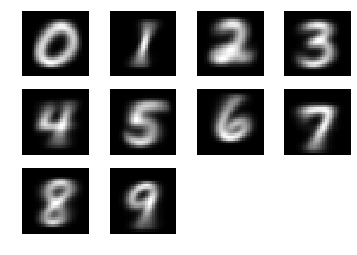

In [2]:
'''
part 1
Compute and plot the mean of each digit
'''
mu = [np.mean(train_data[:,train_labels == i], axis=1) for i in xrange(10)]
mu_image = [np.reshape(mu[i], (len(mu[i])**.5, len(mu[i])**.5)).T for i in xrange(len(mu))]

for i in xrange(10):
    plt.subplot(3,4,i+1)
    plt.imshow(mu_image[i], interpolation='nearest', cmap=gray)
    plt.axis('off')
plt.show()
plt.close()


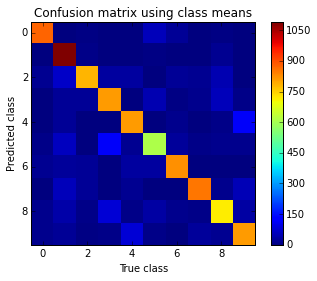

17.97 % error


In [3]:
'''
part 2
Classify the test data using a simple mean classifier.
Plot a confusion matrix.
Print the classification error rate.
'''
def mean_classify(x):
    return np.argmin(np.sum((x-mu)**2, axis=1))

N = test_data.shape[1]
confusion = np.zeros((10,10))
for i in xrange(N):
    actual = test_labels[i]
    prediction = mean_classify(test_data[:,i])
    confusion[actual, prediction] += 1

plt.imshow(confusion, interpolation='nearest')
plt.title("Confusion matrix using class means")
plt.xlabel("True class")
plt.ylabel("Predicted class")
plt.colorbar()
plt.show()
plt.close()

error = (np.sum(confusion) - np.sum(np.diag(confusion))) / N * 100
print error, "%", "error"


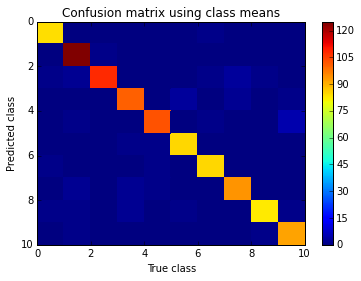

4.0 % error


In [4]:
'''
part 3
Use a full kernel density estimator to classify the data.
Plot a confusion matrix.
Print the classification error rate.
'''
def kde_classify(x):
    # reshape so that broadcasting works
    x = np.reshape(x, (len(x), 1))
    probs = []
    for i in xrange(10):
        group = train_data[:,train_labels == i]
        diff = x - group
        exponents = -.5 * (np.linalg.norm(diff, axis=0)**2)
        probs.append(np.mean(np.exp(exponents)))
    return np.argmax(probs)

confusion = np.zeros((10,10))
N = 1000
for i in xrange(N):
    actual = test_labels[i]
    prediction = kde_classify(test_data[:,i])
    confusion[actual, prediction] += 1

plt.pcolor(confusion)
plt.title("Confusion matrix using class means")
plt.xlabel("True class")
plt.ylabel("Predicted class")
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()
plt.close()

error = (np.sum(confusion) - np.sum(np.diag(confusion))) / N * 100
print error, "%", "error"


Outlier index:  41


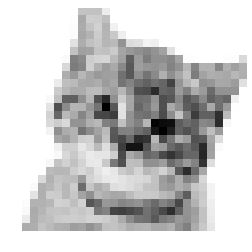

In [20]:
'''
Extra Credit
Find the anomaly int the training data using kde techniques.
'''
def kde_classify(x):
    # reshape so that broadcasting works
    x = np.reshape(x, (len(x), 1))
    probs = []
    for i in xrange(10):
        group = train_data[:,train_labels == i]
        diff = x - group
        exponents = -.05 * (np.linalg.norm(diff, axis=0)**2)
        probs.append(np.mean(np.exp(exponents)))
    return np.max(probs)

outlier_ind = np.argmin([kde_classify(train_data[:,i]) for i in xrange(1000)])
image = np.reshape(train_data[:,outlier_ind], (28,28)).T
print "Outlier index: ", outlier_ind
plt.imshow(image, interpolation='nearest', cmap=gray)
plt.axis('off')
plt.show()
plt.close()
